[[1. 1.]] g1:- [[-3.64598352]] g2:  [[-3.83787707]]
[[ 1. -1.]] g1:- [[-7.39598352]] g2:  [[-11.83787707]]
[[4. 5.]] g1:- [[-33.64598352]] g2:  [[-14.83787707]]
[[-2.   2.5]] g1:- [[-28.37254602]] g2:  [[-18.08787707]]
[[0. 2.]] g1:- [[-4.73973352]] g2:  [[-5.83787707]]
[[ 2. -3.]] g1:- [[-32.39598352]] g2:  [[-26.83787707]]


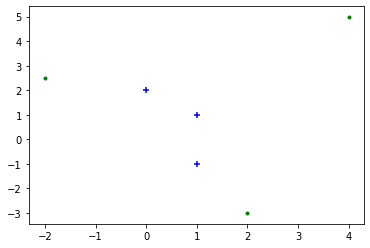

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



data=pd.read_csv('test.txt',sep=',',header=None)
data=data.values
data

mu_1=np.matrix([0,0])
mu_2=np.matrix([2,2])

sigma_1=np.matrix([[.25,.3],[.3,1]])
sigma_2=np.matrix([[.5,0],[0,.5]])


# print('Mu 1: ',mu_1)
# print('Mu 2: ',mu_2)
# print('Sigma 1: ',sigma_1)
# print('Sigma 2: ',sigma_2)

list=[]
for sample in data:
    temp=sample
    sample=np.matrix(sample)
    


    for i in range(2):
        if i==0:
            g1=-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma_1))-0.5*(sample-mu_1)*np.linalg.inv(sigma_1)*(sample-mu_1).T+np.log(0.5)
#             print(g1)
        if i==1:
            g2=-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma_2))-0.5*(sample-mu_2)*np.linalg.inv(sigma_2)*(sample-mu_2).T+np.log(0.5)
#             print(g2)
            
    print(sample,'g1:-',g1,'g2: ',g2)        
    if g1>g2:
        plt.scatter(temp[0],temp[1],marker="+",color='blue')
        list.append([temp[0],temp[1],1])
    else:
        plt.scatter(temp[0],temp[1],marker=".",color='green')
        list.append([temp[0],temp[1],2])

        
plt.show()
            




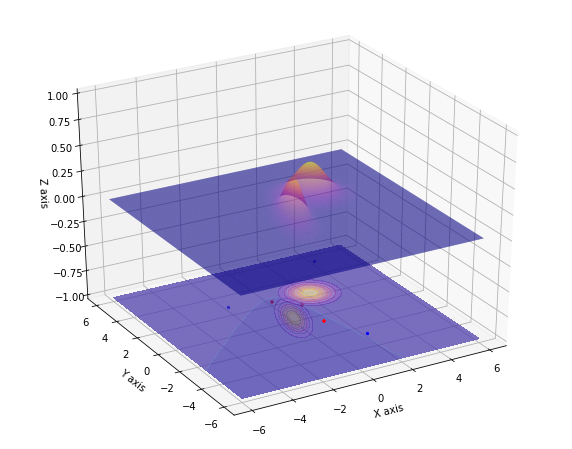

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from matplotlib import cm

from sympy import lambdify

#Parameters to set
mu_1=np.array([0,0])
mu_2=np.array([2,2])

sigma_1=np.array([[.25,.3],[.3,1]])
sigma_2=np.array([[.5,0],[0,.5]])



#Create grid and multivariate normal
x = np.linspace(-6,6,500)
y = np.linspace(-6,6,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu_1, sigma_1)
rv2 = multivariate_normal(mu_2,sigma_2)

#Make a 3D plot


fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos),rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.plasma, alpha=0.4)
ax.plot_surface(X, Y, rv2.pdf(pos),rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.plasma, alpha=0.4)

cset = ax.contourf(X, Y, rv.pdf(pos), zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, rv2.pdf(pos), zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, rv.pdf(pos)-rv2.pdf(pos), zdir='z', offset=-1, cmap='Blues', alpha=0.2)


# ax.scatter(-4,2,-1,color='green',marker='+')
# ax.plot_surface(X, Y, rv.pdf(pos))
# ax.plot_surface(X, Y, rv2.pdf(pos))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_zlim3d(-1,1)

ax.view_init(azim=240)

for x,y,l in list:
    if l==1:
        ax.scatter(x,y,-1,color='red',marker='+')
    else:
        ax.scatter(x,y,-1,color='blue',marker='.')
        







plt.show()


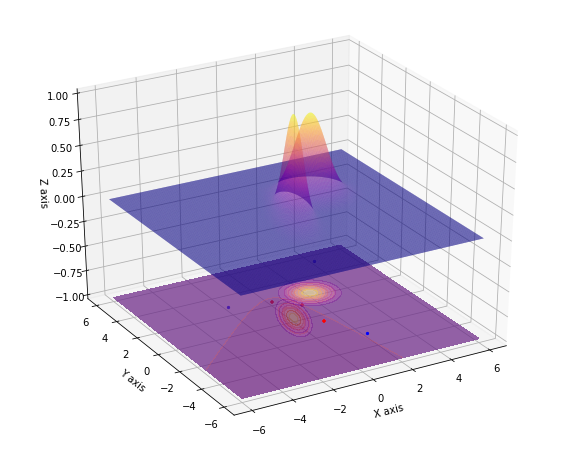

In [4]:
from numpy import *
import math
%matplotlib inline


mu_1=np.matrix([0,0])
mu_2=np.matrix([2,2])

sigma_1=np.matrix([[.25,.3],[.3,1]])
sigma_2=np.matrix([[.5,0],[0,.5]])


x = np.linspace(-6,6,500)
y = np.linspace(-6,6,500)
X, Y = np.meshgrid(x,y)
# print(X)
# print(Y)
        

    
        
def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
#     print('sX,sM,sigmaShape:',size,len(mu),sigma.shape)
    
    
    det = linalg.det(sigma)



    norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
    x_mu = matrix(x - mu)
    inv = np.linalg.inv(sigma)        
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    return norm_const * result    

    
# print(norm_pdf_multivariate(np.matrix([1,2]),mu_1,sigma_1))    
pdf1=[]
pdf2=[]
for i in range(len(X)):
    temp1=[]
    temp2=[]
    for j in range(len(X)):
            n1=norm_pdf_multivariate(np.matrix([X[i,j],Y[i,j]]),mu_1,sigma_1)
            n2=norm_pdf_multivariate(np.matrix([X[i,j],Y[i,j]]),mu_2,sigma_2)
            
            temp1.append(n1)
            temp2.append(n2)
    pdf1.append(temp1)
    pdf2.append(temp2)
Z1=np.array(pdf1)
Z2=np.array(pdf2)
# print(Z1)


fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z1,rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.plasma, alpha=0.4)
ax.plot_surface(X, Y, Z2,rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.plasma, alpha=0.4)

cset = ax.contourf(X, Y, Z1, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, Z2, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, Z1-Z2, zdir='z', offset=-1, cmap='Reds', alpha=0.2)


# ax.scatter(-4,2,-1,color='green',marker='+')
# ax.plot_surface(X, Y, rv.pdf(pos))
# ax.plot_surface(X, Y, rv2.pdf(pos))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_zlim3d(-1,1)

ax.view_init(azim=240)

for x,y,l in list:
    if l==1:
        ax.scatter(x,y,-1,color='red',marker='+')
    else:
        ax.scatter(x,y,-1,color='blue',marker='.')
        







plt.show()


In [5]:
%matplotlib qt

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z1,rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.plasma, alpha=0.4)
ax.plot_surface(X, Y, Z2,rstride=3, cstride=3, linewidth=1, antialiased=True,cmap=cm.plasma, alpha=0.4)

cset = ax.contourf(X, Y, Z1, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, Z2, zdir='z',  offset=-1, cmap=cm.plasma, alpha=0.4)
cset = ax.contourf(X, Y, Z1-Z2, zdir='z', offset=-1, cmap='Blues', alpha=0.2)


# ax.scatter(-4,2,-1,color='green',marker='+')
# ax.plot_surface(X, Y, rv.pdf(pos))
# ax.plot_surface(X, Y, rv2.pdf(pos))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_zlim3d(-1,1)


for x,y,l in list:
    if l==1:
        ax.scatter(x,y,-1,color='red',marker='P')
    else:
        ax.scatter(x,y,-1,color='blue',marker='^')
        




for angle in range(0, 360,3):
    ax.view_init(22, angle)
#     print(angle)
    plt.draw()
    plt.pause(0.001)
    if angle==359:
        angle=0
    




In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

from sympy import lambdify

#Parameters to set
mu_1=np.array([0,0])
mu_2=np.array([2,2])

sigma_1=np.array([[.25,.3],[.3,1]])
sigma_2=np.array([[.5,0],[0,.5]])



#Create grid and multivariate normal
x = np.linspace(-6,6,4)
y = np.linspace(-6,6,4)
X, Y = np.meshgrid(x,y)
print(X)
print(Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu_1, sigma_1)
rv2 = multivariate_normal(mu_2,sigma_2)

print(rv.pdf(pos))


pdf1=[]
pdf2=[]
for i in range(len(X)):
    temp1=[]
    temp2=[]
    for j in range(len(X)):
            n1=norm_pdf_multivariate(np.matrix([X[i,j],Y[i,j]]),mu_1,sigma_1)
            n2=norm_pdf_multivariate(np.matrix([X[i,j],Y[i,j]]),mu_2,sigma_2)
            
            temp1.append(n1)
            temp2.append(n2)
    pdf1.append(temp1)
    pdf2.append(temp2)
Z1=np.array(pdf1)
Z2=np.array(pdf2)
print(Z1)


[[-6. -2.  2.  6.]
 [-6. -2.  2.  6.]
 [-6. -2.  2.  6.]
 [-6. -2.  2.  6.]]
[[-6. -6. -6. -6.]
 [-2. -2. -2. -2.]
 [ 2.  2.  2.  2.]
 [ 6.  6.  6.  6.]]
[[6.94986152e-33 5.34776920e-09 1.53080887e-28 1.63012570e-91]
 [1.43247322e-41 1.17792455e-04 3.60329854e-11 4.10048122e-61]
 [4.10048122e-61 3.60329854e-11 1.17792455e-04 1.43247322e-41]
 [1.63012570e-91 1.53080887e-28 5.34776920e-09 6.94986152e-33]]
[[1.74207194e-32 1.34048695e-08 3.83716880e-28 4.08611917e-91]
 [3.59067789e-41 2.95261899e-04 9.03213001e-11 1.02783822e-60]
 [1.02783822e-60 9.03213001e-11 2.95261899e-04 3.59067789e-41]
 [4.08611917e-91 3.83716880e-28 1.34048695e-08 1.74207194e-32]]


In [6]:
sample.shape

(1, 2)